In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np


In [5]:
train=pd.read_csv('Train_UWu5bXk.csv')
test=pd.read_csv('Test_u94Q5KV.csv')

In [6]:
train['source']="train"
test['source']="test"

In [13]:
data=pd.concat([train,test],axis=0,sort=False)

In [14]:
data.shape

(14204, 13)

In [15]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [22]:
# Categorial data split

categorical_columns =[ i for i in data.dtypes.index if data.dtypes[i]=='object']
categorical_columns=[i for i in categorical_columns if i not in ('Item_Identifier','Outlet_Size') ]
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Type',
 'source']

In [24]:
numerical_columns=[ i for i in data.dtypes.index if data.dtypes[i]!='object']
numerical_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [28]:
data['Item_Weight']=data.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))

In [29]:
data['Outlet_Size']=data.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x:x.fillna(x.mode()[0]))

In [30]:
data['Item_Weight'].isnull().sum()

0

In [31]:
data['Outlet_Size'].isnull().sum()

0

In [33]:
data.loc[data['Item_Visibility']==0,'Item_Visibility']=np.nan

In [36]:
data['Item_Visibility']=data.groupby('Item_Type')['Item_Visibility'].transform(lambda x:x.fillna(x.median()))

In [39]:
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [38]:
data.Item_Fat_Content.replace({'LF':'Low Fat',
                               'low fat':'Low Fat',
                               'reg':'Regular'                                                            
                               },inplace=True                     
                              )

In [42]:
data['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [45]:
data.loc[data['Outlet_Type'].str.startswith("Supermarket"),"Outlet_subType"]="Supermarket"
data.loc[data['Outlet_Type'].str.startswith("Grocery"),"Outlet_subType"]="Grocery"
          

In [47]:
data.Outlet_subType.value_counts()

Supermarket    12399
Grocery         1805
Name: Outlet_subType, dtype: int64

In [48]:
data['Outlet_tenure']=2019-data['Outlet_Establishment_Year']

In [49]:
data['']

0       20
1       10
2       20
3       21
4       32
5       10
6       32
7       34
8       17
9       12
10      20
11      22
12      20
13      22
14      32
15      22
16      10
17      20
18      34
19      15
20      32
21      34
22      15
23      34
24      22
25      12
26      15
27      32
28      21
29      34
        ..
5651    32
5652    17
5653    15
5654    32
5655    34
5656    34
5657    22
5658    32
5659    20
5660    32
5661    34
5662    12
5663    10
5664    10
5665    34
5666    22
5667    22
5668    21
5669    34
5670    12
5671    20
5672    20
5673    10
5674    22
5675    20
5676    22
5677    10
5678    17
5679    12
5680    17
Name: Outlet_tenure, Length: 14204, dtype: int64

In [52]:
data['Item_code']=data['Item_Identifier'].apply(lambda x:x[:2])

In [53]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_subType,Outlet_tenure,Item_code
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Supermarket,20,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Supermarket,10,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Supermarket,20,FD
3,FDX07,19.20,Regular,0.058372,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,Grocery,21,FD
4,NCD19,8.93,Low Fat,0.047912,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Supermarket,32,NC


In [71]:

#categorical_columns =[ i for i in data.dtypes.index if data.dtypes[i]=='object']
categorical_columns=data.select_dtypes(include='object')

In [79]:
#numerical_columns =[ i for i in data.dtypes.index if data.dtypes[i]!='object']
numerical_columns=data.select_dtypes(exclude='object')

In [77]:
data_encode=pd.get_dummies(categorical_columns.drop(columns=['Item_Identifier','source']))


In [78]:
data_encode.shape

(14204, 43)

In [80]:
numerical_columns.shape

(14204, 6)

In [114]:
preprocess=pd.concat([data_encode,numerical_columns,data[['Item_Identifier','source','Outlet_Identifier']]],axis=1)

In [115]:
preprocess=preprocess.drop(columns=['Outlet_Establishment_Year'],axis=1)

Index(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Groce

In [175]:
preprocess_train=preprocess.loc[preprocess["source"]=="train",:]

In [176]:
preprocess_test=preprocess.loc[preprocess["source"]=="test",:]

In [142]:
Benchmark_test=preprocess_test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
 
Benchmark_test['Item_Outlet_Sales']=preprocess_train.Item_Outlet_Sales.mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [154]:
Benchmark_test.to_csv('benchmark_submission.csv',index=False)

In [177]:
#Drop unnecessary columns:
preprocess_test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
preprocess_train.drop(['source'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [178]:
print(preprocess_train.shape)
print(preprocess_test.shape)

(8523, 50)
(5681, 49)


In [146]:
X=preprocess_train.drop(columns='Item_Outlet_Sales')
y=preprocess_train['Item_Outlet_Sales']

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics as m
alg = LinearRegression()
 

In [182]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import cross_validation, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    print(predictors)
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


Model Report
RMSE : 1127
CV Score : Mean - 1132 | Std - 44.06 | Min - 1076 | Max - 1220
['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular', 'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store', 'Out

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


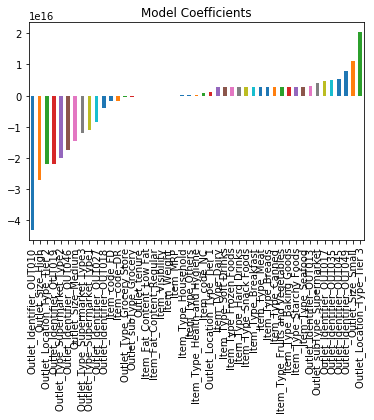

In [183]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
%matplotlib inline
predictors = [x for x in preprocess_train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, preprocess_train, preprocess_test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')